In [1]:
# define rooms and items
import simpleaudio as sa

couch = {
    "name": "couch",
    "type": "furniture",
}

door_a = {
    "name": "door a",
    "type": "door",
}

door_b = {
    "name": "door b",
    "type": "door",
}

door_c = {
    "name": "door c",
    "type": "door",
}

door_d = {
    "name": "door d",
    "type": "door",
}

door_e = {
    "name": "door e",
    "type": "door",
}



key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}

key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}

key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}

key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
}

key_e = {
    "name": "key for door e",
    "type": "key",
    "target": door_e,
}

#when we have a key that opens a door - create another target
piano = {
    "name": "piano",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

dining_table = {
    "name": "dining table",
    "type": "furniture",
}

fridge = {
    "name": "fridge",
    "type": "furniture",
}

game_room = {
    "name": "game room",
    "type": "room",
}


bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}

bedroom_2 = {
    "name": "bedroom 2",
    "type": "room",
}

living_room = {
    "name": "living room",
    "type": "room",
}

kitchen_room = {
    "name": "kitchen room",
    "type": "room",
}

queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}

double_bed = {
    "name": "double bed",
    "type": "furniture",
}


outside = {
  "name": "outside"
}



all_rooms = [game_room, bedroom_1, bedroom_2, living_room, kitchen_room, outside]

all_doors = [door_a, door_b, door_c, door_d, door_e]

# define which items/rooms are related

object_relations = {
    "game room": [couch, piano, door_a],
    "bedroom 1": [queen_bed, door_a, door_b, door_c],
    "queen bed": [key_b],
    "piano": [key_a],
    "outside": [door_d],
    "door a": [game_room, bedroom_1],
    "door b": [bedroom_1, bedroom_2],
    "door c": [bedroom_1, living_room],
    "door d": [living_room, outside],
    "bedroom 2": [door_b, double_bed, dresser],
    "double bed": [key_c],
    "dresser": [],
    "living room": [door_c, door_d, dining_table, door_e],
    "dining table": [key_e],
    "kitchen room":[door_e, fridge],
    "door e":[kitchen_room, living_room],
    "fridge": [key_d]
    
    
}

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room, 
    "keys_collected": [],
    "target_room": outside
}

In [2]:
game_state = INIT_GAME_STATE.copy()


In [3]:
def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    from IPython.display import display, Image
    display(Image(filename=r'/Users/marionaboschbertral/Desktop/DATA/Python-Project-Group-3/python-project-copy/your-code/OIP.jpg'))
    wave_obj2 = sa.WaveObject.from_wave_file("horror_one_028.wav")
    play_obj2 = wave_obj2.play()
    #play_obj2.wait_done()
    play_room(game_state["current_room"])
    
    
def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either 
    explore (list all items in this room) or examine an item found here.
    """
    #sets the game state to the input of the function 
    game_state["current_room"] = room    
    
    #if the gamestate dictionary value for "Current room" equals the game state dictionary value for "Target Room" 
    if(game_state["current_room"] == game_state["target_room"]):    
        #adding sounds
        wave_obj2 = sa.WaveObject.from_wave_file("/Users/marionaboschbertral/Desktop/DATA/Python-Project-Group-3/python-project-copy/your-code/winning_sound.wav")
        play_obj2 = wave_obj2.play()
        play_obj2.wait_done()
        print("Congrats! You escaped the room!")  
        #else
    else:   
        #print "You are in the  room(input of the function) name
        print("You are now in " + room["name"])
        #makes a variable storing the input of the user
        intended_action = input("What would you like to do? Type 'explore' or 'examine'?").strip() 
        #if the users input = "Explore"
        if intended_action == "explore":
            #call the explore_room function with input room
            explore_room(room)    
            # call the same playroom fucntion again
            play_room(room) 
            #if users input for intended_action = examine
        elif intended_action == "examine":         
            #make another variable storing the input for examine 
            examine_item(input("What would you like to examine?").strip())
            #else
        else:
            #print "Not sure what you mean. Type 'explore' or 'examine'" "
            print("Not sure what you mean. Type 'explore' or 'examine'.")
            #call the playroom function again
            play_room(room)
        linebreak()
        
#makes a function called exploreroom and the input in the room
def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    #makes a variable that loops through each element in the object_relations and matches it with the "name" field. printing the value for that key
    items = [i["name"] for i in object_relations[room["name"]]]
    #print sentence with room name and items joined together in
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))


#defines a function called  get_next_room_of_door who's inputs are door and current_room  
def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    #for 
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been 
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    #sets current room to the game state
    current_room = game_state["current_room"]
    # next room = empty string
    next_room = ""
    output = None
    # loops through each key/value in object relations based on? the current room
    for item in object_relations[current_room["name"]]:
        #if item "name" equals item_name 
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                    wave_obj = sa.WaveObject.from_wave_file("/Users/marionaboschbertral/Desktop/DATA/Python-Project-Group-3/python-project-copy/your-code/glitchedtones_door_open.wav")
                    play_obj = wave_obj.play()
                    play_obj.wait_done()
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")
    
    if(next_room and input("Do you want to go to the next room? Enter 'yes' or 'no'").strip() == 'yes'):
        wave_obj1 = sa.WaveObject.from_wave_file("/Users/marionaboschbertral/Desktop/DATA/Python-Project-Group-3/python-project-copy/your-code/footsteps.wav")
        play_obj1 = wave_obj1.play()
        play_obj1.wait_done()
        play_room(next_room)
    else:
        play_room(current_room)
        
        

    

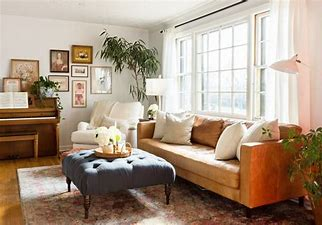

You are now in game room
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is game room. You find couch, piano, door a
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?piano
You examine piano. You find key for door a.
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door a
You examine door a. You unlock it with a key you have.
Do you want to go to the next room? Enter 'yes' or 'no'yes
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is bedroom 1. You find queen bed, door a, door b, door c
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?queen bed
You examine queen bed. You find key for door b.
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?exa

In [ ]:
try:
    import tkinter as tk                # python 3
    from tkinter import font as tkfont  # python 3
except ImportError:
    import Tkinter as tk     # python 2
    import tkFont as tkfont  # python 2
from PIL import ImageTk ,Image


class SampleApp(tk.Tk):

    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)

        self.title_font = tkfont.Font(family='Helvetica', size=25, weight="bold", slant="italic")
        self.customfont = tkfont.Font(family="Arial", size=20, slant="italic")

        # the container is where we'll stack a bunch of frames
        # on top of each other, then the one we want visible
        # will be raised above the others
        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (StartPage, PageOne, PageTwo,startgame,marc,luke,goncalo,game):
            page_name = F.__name__
            frame = F(parent=container, controller=self)
            self.frames[page_name] = frame

            # put all of the pages in the same location;
            # the one on the top of the stacking order
            # will be the one that is visible.
            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame("StartPage")

    def show_frame(self, page_name):
        '''Show a frame for the given page name'''
        frame = self.frames[page_name]
        frame.tkraise()


class StartPage(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self, text="DO YOU WANT TO PLAY?", font=controller.title_font)
        label.pack(side="top", fill="x", pady=10)

        button1 = tk.Button(self, text="YES",
                            command=lambda: controller.show_frame("PageOne"))
        button2 = tk.Button(self, text="NO",
                            command=lambda: controller.show_frame("PageTwo"))
        button1.pack()
        button2.pack()


class PageOne(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self, text="WELCOME TO THE BEST VIRTUAL ESCAPE ROOM", font=controller.title_font)
        label.pack(side="top", fill="x", pady=10)
        button = tk.Button(self, text="START GAME",
                           command=lambda: controller.show_frame("startgame"))
        button.pack()


class PageTwo(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self, text="BYE BYE", font=controller.title_font)
        label.pack(side="top", fill="x", pady=10)
        
        

        
class startgame(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self,text="CHOOSE YOUR CHARACTER",font=controller.title_font)
        label.pack(side="top", fill="x", pady=10)
        
        self.image = tk.PhotoImage(file="/Users/marionaboschbertral/Downloads/marc.png")
        
        self.image2 = tk.PhotoImage(file="/Users/marionaboschbertral/Downloads/luke.png")
        
        self.image3 = tk.PhotoImage(file="/Users/marionaboschbertral/Downloads/goncalo.png")

        button1 = tk.Button(self, text="Marc",image=self.image,compound="top",
                            command=lambda: controller.show_frame("marc"))
        
        button2 = tk.Button(self, text="Luke",image=self.image2,compound="top",
                            command=lambda: controller.show_frame("luke"))
        
        button3 = tk.Button(self, text="Gonçalo",image=self.image3,compound="top",
                            command=lambda: controller.show_frame("goncalo"))
        
        button1.pack()
        button2.pack(side="right")
        button3.pack(side="left")
        
        
class marc(tk.Frame):

     def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self,text="It's Monday, you get to glovo office tired and hangover and there is no coffee.\n You offer yourself to go with a glovo bike to get some coffee.\n You are riding your bike in the beautiful barcelona and all of a sudden, someone hits your head.",font = controller.customfont)
        label.pack(side="top", fill="x", pady=10)
        button = tk.Button(self,text="PLAY MARC",command=lambda: controller.show_frame("game"))
        button.pack()  
        
class luke(tk.Frame):

     def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self,text="It's Monday,there is a huge demonstration in front of uber offices.\n Taxi drivers are claiming the end of uber.\n You sneak out into the crowd to get to the office, when you are about to get to the back door someone hits your head",font = controller.customfont)
        label.pack(side="top", fill="x", pady=10)
        button = tk.Button(self,text="PLAY LUKE",command=lambda: controller.show_frame("game"))
        button.pack()                  

class goncalo(tk.Frame):

     def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self,text="It's Monday, you are walking to Uni with your mask on to prevent coronavirus.\n Suddenly, someone from the other side of the road starts yelling your name.\n You can't recognize him, so you cross the street to meet the unkown person.\n All of a sudden, someone hits your head",font = controller.customfont)
        label.pack(side="top", fill="x", pady=10)
        button = tk.Button(self,text="PLAY GONÇALO",command=lambda: controller.show_frame("game"))
        button.pack()  
    
class game(tk.Frame):

     def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self,text="You wake up on a couch and find yourself in a strange house with no windows which you have never been to before.\n You don't remember why you are here and what had happened before.\n You feel some unknown danger is approaching and you must get out of the house, NOW!\n Click NEXT and go back to Jupyter Notebook for further instructions.",font = controller.customfont)  
        label.pack(side="top", fill="x", pady=10)
        button = tk.Button(self,text="NEXT",command=start_game)
        button.pack()    
        button = tk.Button(self,text="EXIT",command=lambda: controller.show_frame("PageTwo"))
        button.pack()                   
    
                      
    
if __name__ == "__main__":
    app = SampleApp()
    app.mainloop()